In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('F:\DESKTOP FOLDERS\FULL MACHINE LEARNING\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Python\Position_Salaries.csv')

In [20]:
X = dataset['Level'].values
y = dataset['Salary'].values

In [21]:
X = X.reshape(-1,1)
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [22]:
y = y.reshape(-1,1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
"""
reasons for feature scaling:-
1: SVR has an implicit equation 
2: Coefficients cannot compensate for the diverse in values of the features and labels


will be applied to both feature as well as label
inverse scaling:- getting the original result back from the split 
"""


In [23]:
#feature scaling:-
#we will create seperate objects for X and y
#becoz when we fit we include the mean and SD for x in that object 
#and that same object cannot be used in our label
#therefore a separate diff object for our y 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_y = StandardScaler()
X = sc.fit_transform(X)
y = sc_y.fit_transform(y)

In [24]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [25]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [26]:
#Training the  SVR model on the whole dataset

from sklearn.svm import SVR
# regressor = SVR(<kernel = typeofkernelyouwanttoinput>)
regressor = SVR(kernel = 'rbf') #radialbasisfunction

regressor.fit(X,y)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
#predicting a new result 
#we need to reverse the scale in order to get the original scale of y

sc_y.inverse_transform(regressor.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

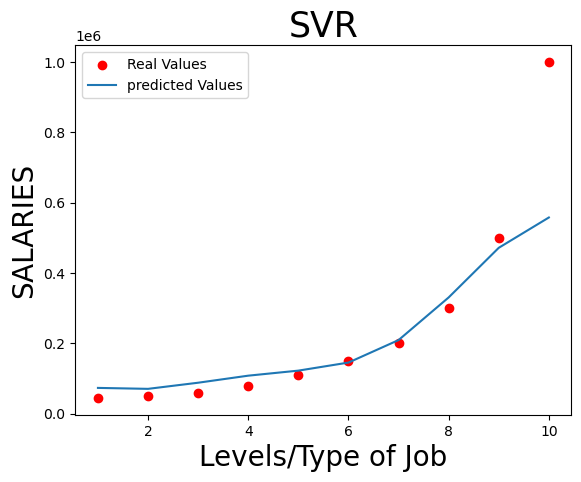

In [30]:
#visualising the results

plt.scatter(sc.inverse_transform(X.reshape(-1,1)),sc_y.inverse_transform(y.reshape(-1,1)), color = 'red', label = 'Real Values')
plt.plot(sc.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), label = 'predicted Values')
plt.xlabel('Levels/Type of Job', fontdict = {'fontsize': 20})
plt.ylabel('SALARIES', fontdict = {'fontsize': 20})
plt.title('SVR', fontdict = {'fontsize': 25})
plt.legend()

plt.show()